In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

import gc #garbage collector

In [30]:
# Importa los datasets de score y titles
score = pd.read_csv('ignore/score.csv')
titles = pd.read_csv('data/all.csv')

In [28]:
print(score.shape)
score.tail(2)

(11024289, 7)


,index,userId,score,timestamp,movieId,year,platform
11024287,1499998,124380,4.5,1196787089,ns7881,2007,n
11024288,1499999,124380,1.5,1196785847,as883,2007,a


In [31]:
titles.tail(2) # No coinciden los encabezados de ambos datasets para movieId e id

,id,platform,type,title,director,cast,country,date_added,release_year,duration_int,duration_type,listed_in,description
22996,ns8806,netflix,movie,zoom,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...",united states,2020-01-11,2006,88,min,"children & family movies, comedies","dragged from civilian life, a former superhero..."
22997,ns8807,netflix,movie,zubaan,mozez singh,"vicky kaushal, sarah-jane dias, raaghav chanan...",india,2019-03-02,2015,111,min,"dramas, international movies, music & musicals",a scrappy but poor boy worms his way into a ty...


In [32]:
# Filtra las columnas userId, movieId y score del dataset score y las columnas id y title del dataset title.
score = score[['userId','movieId','score','platform']]
titles = titles[['id','title']]
titles = titles.rename(columns={'id':'movieId'}) # Cambia el nombre para que haya coincidencia

In [33]:
# Unifica los datasets
df = pd.merge(score,titles,how='left',on='movieId')
df.tail(2)

,userId,movieId,score,platform,title
11024287,124380,ns7881,4.5,n,rocky ii
11024288,124380,as883,1.5,a,storm boy


In [35]:
# Score por plataforma y por pelicula (min = 3.3, max = 3.72)
scoreByP = df.groupby(by=['movieId','platform']).mean()
scoreByP.describe()

/var/folders/qr/g6x89n_d48j570j5qt_7mrhr0000gn/T/ipykernel_87483/2131764330.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scoreByP = df.groupby(by=['movieId','platform']).mean()


,userId,score
count,22998.000000,22998.000000
mean,89970.854705,3.533443
std,3958.849324,0.048564
min,71957.072052,3.336478
25%,87311.498957,3.500000
50%,89895.952853,3.533673
75%,92627.425407,3.567000
max,106359.325581,3.724512


In [36]:
# Usuarios únicos 115077
print('users:',len(score['userId'].unique()))
# Calificaciones de películas por usuario
scoresByUser = score.groupby(['userId']).count()
scoresByUser.tail()

users: 115077


,movieId,score,platform
userId,,,
270892,75,75,75
270893,190,190,190
270894,148,148,148
270895,20,20,20
270896,260,260,260


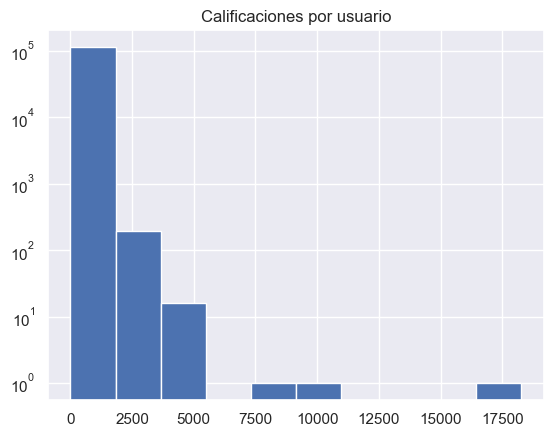

In [37]:
# Distribucion de calificaciones de películas por usuario
plt.hist(scoresByUser.score, log= True)
plt.title('Calificaciones por usuario')
plt.show()

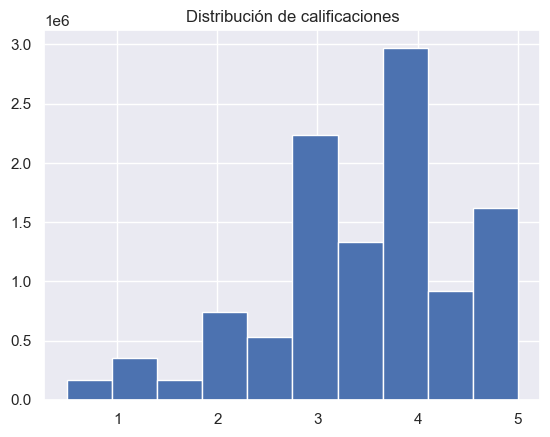

In [38]:
# Distribución de las cantidades de calificaciones
score['score'].hist()
plt.title('Distribución de calificaciones')
plt.show()

In [39]:
# Calificaciones por pelicula
print('movies:',len(score['movieId'].unique()))
scoresByMovie = score.groupby(['movieId']).count()
scoresByMovie.tail()

movies: 22998


,userId,score,platform
movieId,,,
ns995,448,448,448
ns996,494,494,494
ns997,475,475,475
ns998,484,484,484
ns999,479,479,479


In [45]:
# Peliculas/series con mas y menos calificaciones
idx_max = df['userId'].idxmax() # 9524029
print('Mas calificaciones:',df.loc[idx_max].title)
idx_min = df['userId'].idxmin() # 
print('Menos calificaciones:',df.loc[idx_min].title)

Mas calificaciones: kid cosmic
Menos calificaciones: the english civil war


In [64]:
# df_v: Peliculas/series ordenadas por mas a menos calificaciones
df_v = df.groupby(['movieId']).count()
df_v.sort_values('userId', ascending = False, inplace = True)
df_v['viewed'] = df_v['userId']
df_v.drop(columns = ['userId','score','platform','title'], inplace = True)
df_v.head()

,viewed
movieId,
as4197,576
as9065,560
ns7279,558
as848,558
hs2360,556


In [66]:
# Agrega los title al df_v
titles = titles.set_index('movieId')
df_v['title'] = titles.loc[df_v.index].title
df_v

,viewed,title
movieId,,
as4197,576,from other worlds
as9065,560,the organization
ns7279,558,"leapfrog: sing-along, read-along"
as848,558,superbook
hs2360,556,dietland
...,...,...
hs599,404,dave
ns6535,402,cop and a half: new recruit
hs1711,401,i am alone


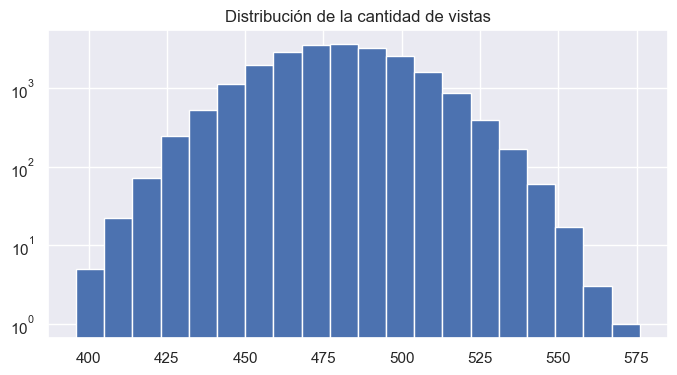

In [67]:
# Grafica la cantidad de vistas
plt.figure(figsize = (8,4))
df_v.viewed[df_v.viewed<1000].hist(log = True, bins = 20)
plt.title('Distribución de la cantidad de vistas')
plt.show()

In [ ]:
# Grafica la cantidad de vistas
plt.figure(figsize = (8,4))
df_v.viewed[df_v.viewed<1000].hist(log = True, bins = 20)
plt.title('Distribución de la cantidad de vistas')
plt.show()